## Image Classifier of Cat and Dog

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#### Load Dataset

In [3]:
x_train = np.loadtxt("petData/input.csv", delimiter = ",")
y_train = np.loadtxt("petData/labels.csv", delimiter = ",")

x_test = np.loadtxt("petData/input_test.csv", delimiter = ",")
y_test = np.loadtxt("petData/labels_test.csv", delimiter = ",")

### Reshaping the Image data

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100,100,3)
y_test = y_test.reshape(len(y_test), 1)


x_train = x_train/255
x_test = x_test/255

In [6]:
print("Shape of x_train", x_train.shape)
print("shape of y_train", y_train.shape)
print("shape of x_test", x_test.shape)
print("shape of y_test", y_test.shape)

Shape of x_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of x_test (400, 100, 100, 3)
shape of y_test (400, 1)


In [7]:
x_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

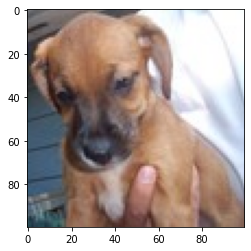

In [8]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

#### Building model

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [10]:
#alternate way to define the model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3,3), activation="relu", input_shape = (100, 100, 3)))
model_cnn.add(MaxPooling2D((2,2)))

model_cnn.add(Conv2D(32, (3,3), activation="relu"))
model_cnn.add(MaxPooling2D((2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation="relu"))
model_cnn.add(Dense(1, activation="sigmoid"))

In [11]:
# opt = keras.optimizers.SGD(learning_rate = 0.001)
# model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [12]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 28s 641ms/step - loss: 0.7300 - accuracy: 0.5265
Epoch 2/5
32/32 [==============================] - 20s 631ms/step - loss: 0.6865 - accuracy: 0.5390
Epoch 3/5
32/32 [==============================] - 20s 629ms/step - loss: 0.6670 - accuracy: 0.5985
Epoch 4/5
32/32 [==============================] - 20s 634ms/step - loss: 0.6497 - accuracy: 0.6120
Epoch 5/5
32/32 [==============================] - 20s 635ms/step - loss: 0.5998 - accuracy: 0.6905


In [13]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 2s 88ms/step - loss: 0.6024 - accuracy: 0.6750


[0.6024275422096252, 0.675000011920929]

#### Making Predictions 

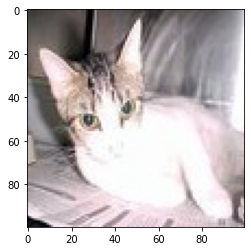

1/1 [==============================] - 0s 25ms/step
This is a cat


In [16]:
idx1 = random.randint(0, len(y_test))
plt.imshow(x_test[idx1, :])
plt.show()

y_pred = model.predict(x_test[idx1, :].reshape(1,100,100,3))

y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = "dog"
else:
    pred = "cat"
    

print("This is a", pred)